blocks 0 {'name': 'xi0', 'pin': [{'contact': [[27160, 17736, 27240, 18552], [27800, 17736, 27880, 18552]], 'name': 'd1'}, {'contact': [[24248, 20128, 30792, 20192]], 'name': 'vbiasn'}, {'contact': [[27480, 18072, 27560, 18888], [28120, 18072, 28200, 18888]], 'name': 'vbiasnd'}, {'contact': [[34040, 18072, 34120, 18888], [34680, 18072, 34760, 18888]], 'name': 'vbiasp1'}, {'contact': [[32088, 20128, 36072, 20192]], 'name': 'vbiasp2'}, {'contact': [[33560, 17568, 33640, 18384], [34200, 17568, 34280, 18384]], 'name': 'vdd'}, {'contact': [[27640, 14544, 27720, 16368]], 'name': 'vinn'}, {'contact': [[27800, 14712, 27880, 16536]], 'name': 'vinp'}, {'contact': [[32248, 19624, 35912, 19688], [24408, 19624, 29672, 19688], [29600, 19624, 32320, 19688]], 'name': 'voutn'}, {'contact': [[33528, 19960, 34632, 20024], [25688, 19960, 30952, 20024], [30880, 19960, 33600, 20024]], 'name': 'voutp'}, {'contact': [[27000, 17568, 27080, 18384], [27640, 17568, 27720, 18384]], 'name': 'vss'}], 'position': [224

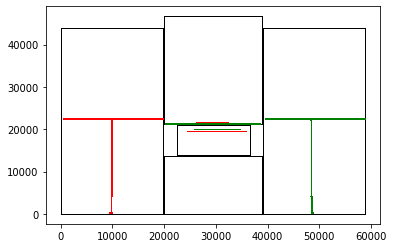

In [69]:
import json
import matplotlib.pyplot as plt

def read_data(filename):
    read_file = filename
    data = json.load(open(read_file,'r'))
    Blocks = data["blocks"]
    Path = data["wires"]
    
    return Blocks,Path

def plot_detail_routing(Blocks,Path,name1,name2):
    
    plt.figure()
    
    #plot_box(node_box['LLx'], node_box['LLy'],node_box['URx'],node_box['URy'],'r')
    
    for block in Blocks:
        
        plot_box(block["position"][0],block["position"][1],block["position"][2],block["position"][3],'k',3)        
    
    index = 1
    for net in Path:
    
        if net['name']!=name1 and net['name']!=name2:
            continue
     
        print(net['name'])
        print(net['path'])
        
        for path in net['path']:
            #plot_line(path[0],path[1],path[2],path[3],'b',5)
            pass

        for connected in net["connection"]:
            contacts = Blocks[connected[0]]["pin"][connected[1]]["contact"]
            for contact in contacts:
              llx = contact[0]
              lly = contact[1]
              urx = contact[2]
              ury = contact[3]
              if index==1:
                c = 'r'
              else:
                c = 'g'
              plot_box(llx,lly,urx,ury,c,4)
            
        index=index+1
        #for stiner_node in net['steiner_node']:
            #plot_dot(stiner_node['x'],stiner_node['y'],'g')
    #plt.xlim((19000, 41000))
    #plt.ylim((17000, 24000))
    plt.savefig("sym_routing", dpi=300)
    
    plt.show()
    
def plot_box(llx,lly,urx,ury,c,zorder):
    plt.plot([llx,urx], [lly,lly], lw=1, color=c, zorder=zorder)
    plt.plot([urx,urx], [lly,ury], lw=1, color=c, zorder=zorder)
    plt.plot([urx,llx], [ury,ury], lw=1, color=c, zorder=zorder)
    plt.plot([llx,llx], [lly,ury], lw=1, color=c, zorder=zorder)
    
def plot_line(llx,lly,urx,ury,c,zorder):
    plt.plot([llx,urx], [lly,ury], lw=2, color=c, zorder=zorder)
    
def plot_dot(x,y,c,zorder):
    plt.plot(x,y, 'o', color=c, zorder=zorder)


Blocks,Path=read_data("Results/switched_capacitor_filter_DetailRoute_0.json")
#print(Path)

print('blocks 0',Blocks[0])


plot_detail_routing(Blocks,Path,"voutn","voutp")


